In [1]:
import pandas as pd

In [2]:
from sklearn.datasets import load_digits
digits=load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

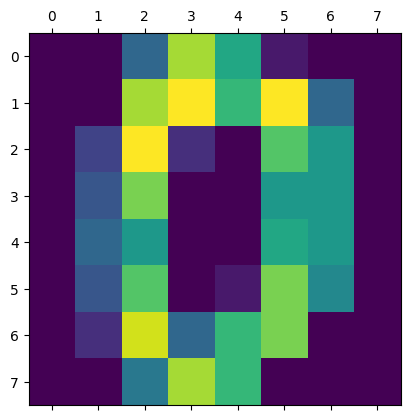

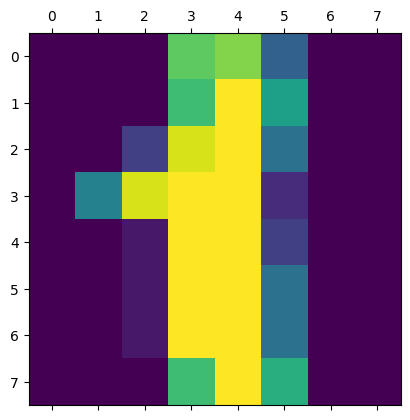

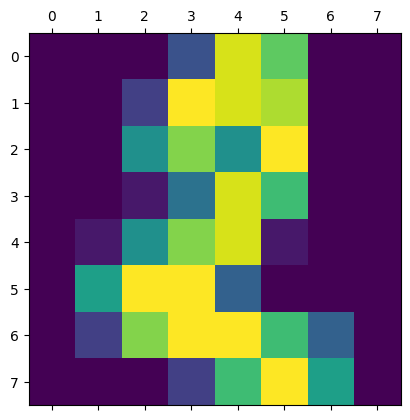

In [4]:
from matplotlib import pyplot as plt
for i in range(3):
    plt.matshow(digits.images[i])

In [5]:
data=pd.DataFrame(digits.data)
data["target"]=digits.target
data

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [6]:
y=data.target
x=data.drop(["target"],axis="columns")

In [7]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y)

In [8]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(xtrain,ytrain)
model.score(xtest,ytest)

0.9822222222222222

In [9]:
model.predict(xtest.head())

array([8, 1, 1, 1, 9])

In [10]:
ytest.head()

379     8
471     1
1250    1
363     1
585     9
Name: target, dtype: int64

In [12]:
ytrue=ytest
yprdt=model.predict(xtest)

In [13]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ytrue,yprdt)
cm

array([[45,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 47,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 45,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 43,  0,  1,  0,  2,  0,  0],
       [ 0,  0,  0,  0, 53,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 49,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 39,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 42,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 36,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  1,  1, 43]])

<Axes: >

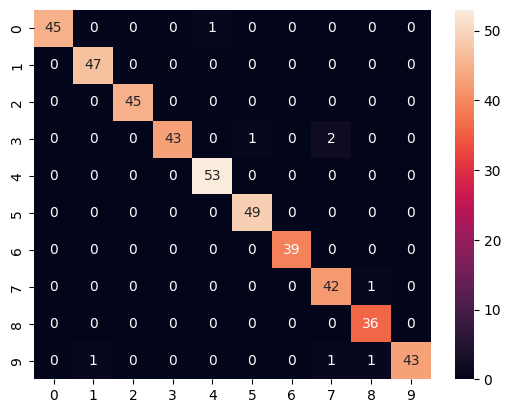

In [14]:
import seaborn as sns
sns.heatmap(cm,annot=True)